In [147]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [148]:
# Veri setini yükle
df = pd.read_csv('train.csv')

In [149]:
# Veri setinin ilk 5 satırını görüntüle
print("Veri setinin ilk 5 satırı:")
print(df.head())

Veri setinin ilk 5 satırı:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePr

In [150]:
# Veri setinin genel bilgileri
print("\nVeri seti hakkında genel bilgiler:")
print(df.info())


Veri seti hakkında genel bilgiler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1

In [151]:
# Deskriptif istatistikler
print("\nVeri setinin deskriptif istatistikleri:")
print(df.describe())


Veri setinin deskriptif istatistikleri:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904   

In [152]:
# Eksik verileri kontrol et
print("\nEksik veriler:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])#gözlemlenen eksik değerlerin bulunduğu durumları göstererek hangi değişkenlerin eksik değerlere sahip olduğunu belirler


Eksik veriler:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [153]:
# Eksik verileri ortalama ile doldur
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [154]:
# Gereksiz sütunları kaldır
df.drop(['Alley'], axis=1, inplace=True)


In [155]:
# Kategorik değişkenleri sayısal verilere dönüştür
df = pd.get_dummies(df)


In [156]:
# Temizlenmiş veri setini kontrol et
print("\nTemizlenmiş veri setinin ilk 5 satırı:")
print(df.head())


Temizlenmiş veri setinin ilk 5 satırı:
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...           False         False   
1          1976         0.0         978  ...           False         False   
2          2002       162.0         486  ...           False         False   
3          1970         0.0         216  ...           False         False   
4          2000       350.0         655  ...           False         False   

   SaleTyp

In [157]:
# Hedef değişken ve özellikleri ayır
X = df.drop(['SalePrice'], axis=1)  # Özellikler
y = df['SalePrice']  # Hedef değişken (ev fiyatı)

In [158]:
# Eğitim ve test verilerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
import joblib
# Modeli oluştur
model = RandomForestRegressor(n_estimators=100, random_state=42)#100 karar ağacından oluşan ve 42 numaralı rastgelelikte kontrol eden bir rastgele orman regresyon modeli

In [160]:
# Modeli eğitim verisini oluştur ve eğit
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [161]:
# Modeli kaydet
joblib.dump(model, 'housing_price_model.pkl')
print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


In [162]:
# Test verisi ile tahmin yap
y_pred = model.predict(X_test)

In [163]:
# Modelin doğruluğunu değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Mean Squared Error (MSE): 827938131.1959544
R-squared (R²): 0.8920595931865097


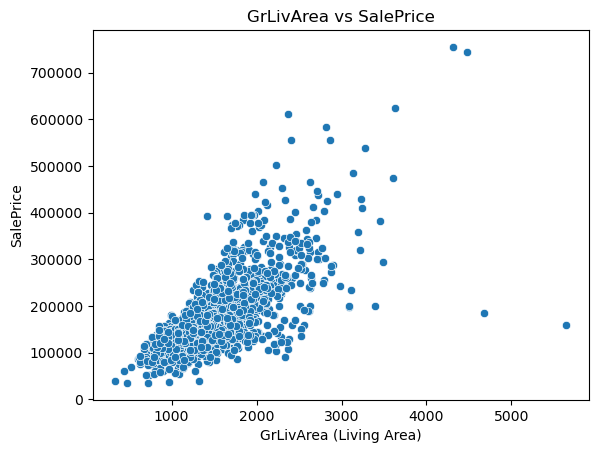

In [164]:
# Fiyat ile GrLivArea arasındaki ilişkiyi görselleştir
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Living Area)')
plt.ylabel('SalePrice')
plt.show()

In [165]:
# Yeni bir tahmin girdisi oluştur
new_data = {
    'GrLivArea': 2000,  # Yaşanabilir alan(örnek veri)
    'LotArea': 9000,    # Arsa alanı
    # Buraya veri setindeki diğer özelliklerin uygun değerlerini ekleriz
}

In [166]:
# Tahmin verisini DataFrame'e çevir(yeni veri seti oluşturmak için)
new_data_df = pd.DataFrame([new_data])

In [167]:
# Tahmin için gerekli sütunlara dönüştür
new_data_df = pd.get_dummies(new_data_df) #yeni veriyi eğitim setiyle aynı yapıya dönüştürür
new_data_df = new_data_df.reindex(columns=X.columns, fill_value=0) #Eğitim setinde olan ama yeni tahmin girdisinde olmayan sütunları sıfırla doldurur

In [168]:
# Tahmin yap
predicted_price = model.predict(new_data_df) #model artık eğitilmiş olduğundan, yeni veriyi modele verip hedef değişkeni tahmin etmek için
print(f"\nTahmin Edilen Ev Fiyatı: {predicted_price[0]:,.2f}")#Modelin tahmin ettiği fiyatı kullanıcıya göster


Tahmin Edilen Ev Fiyatı: 116,060.65


In [169]:
import joblib

# Eğitim sırasında kullanılan sütunları kaydet
joblib.dump(X_train.columns, 'feature_columns.pkl')  # Eğitimde kullanılan sütunları kaydet
print("Eğitimde kullanılan sütunlar kaydedildi!")

Eğitimde kullanılan sütunlar kaydedildi!
